## Computer vision Assignment
## MOHD NAZIM ANSARI
## 19BAI10088


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
from skimage.feature import hog
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import seaborn as sns

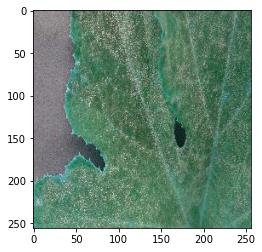

In [3]:
#reaing an image
image_path=cv2.imread('d:\\new\\New Plant Diseases Dataset(Augmented)\\train\\Squash___Powdery_mildew\\00cfd4c7-4ccd-45a8-813c-f1cb01147aed___UMD_Powd.M 0108.jpg')
plt.imshow(image_path)

In [4]:
dir ='C:\\Users\\shiv taneja\\New Plant Diseases Dataset(Augmented)\\train'


categories=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Blueberry___healthy',
           'Cherry_(including_sour)___healthy','Cherry_(including_sour)___Powdery_mildew',
            'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
           ,'Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight','Grape___Black_rot',
           'Grape___Esca_(Black_Measles)','Grape___healthy','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
           'Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot','Peach___healthy',
            'Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___healthy',
           'Potato___Late_blight','Raspberry___healthy','Soybean___healthy','Squash___Powdery_mildew',
            'Strawberry___healthy','Strawberry___Leaf_scorch','Tomato___Bacterial_spot','Tomato___Early_blight',
           'Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot',
           'Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus',
            'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


data=[]

for i in categories:
    path=os.path.join(dir,i)
    label=categories.index(i)
    
    for img in os.listdir(path):
        img_path=os.path.join(path,img)
        image=cv2.imread(img_path)
        resized_image=cv2.resize(image,(64,128))
        fd,hog_image=hog(resized_image,orientations=9,pixels_per_cell=(8,8),        # hog is used here for feature extraction 
                        cells_per_block=(2,2),visualize=True,multichannel=True)
        
        data.append([fd,label])

In [6]:
random.shuffle(data)
x=[]
y=[]
for feature,label in data:
    x.append(feature)
    y.append(label)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50)

In [8]:
svm_clf=SVC(kernel='rbf')
svm_clf.fit(x_train,y_train)
svm_pred=svm_clf.predict(x_test)
svm_acc=svm_clf.score(x_test,y_test)

In [9]:
forest_clf=RandomForestClassifier(n_estimators=400)
forest_clf.fit(x_train,y_train)
forest_pred=svm_clf.predict(x_test)
forest_acc=forest_clf.score(x_test,y_test)

In [10]:
knn_clf=KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(x_train,y_train)
knn_clf_pred=knn_clf.predict(x_test)
knn_clf_acc=knn_clf.score(x_test,y_test)

In [11]:
acc=[svm_acc,forest_acc,knn_clf_acc]
model=['svm','random forest','kNN']

In [12]:
f1_svm=f1_score(y_test,svm_pred,average='weighted')
f1_forest=f1_score(y_test,forest_pred,average='weighted')
f1_knn=f1_score(y_test,knn_clf_pred,average='weighted')

f1=[f1_svm,f1_forest,f1_knn]

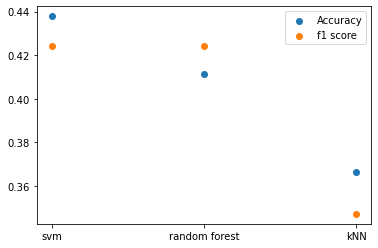

In [13]:
plt.figure()
plt.scatter(model,acc,label='Accuracy')
plt.scatter(model,f1,label='f1 score')
plt.legend()

In [5]:
len(data)

1964